## Grouping by season in order to plot along elevation.

In [2]:
import s3fs
import xarray as xr
import s3fs
import seaborn as sns
import matplotlib.pyplot as plt
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [4]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [5]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [6]:
filelist = [make_file_path_for_var(v) for v in varl]

In [7]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds_aero2012 = xr.open_mfdataset(list_of_s3_obj)

In [8]:
sulphate_varl = ['SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR'] 

In [9]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [10]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds2012 = xr.open_mfdataset(list_of_s3_obj)

In [11]:
ds2012['SO4_tot'] = 0
for var in sulphate_varl:
    ds2012['SO4_tot'] = ds2012['SO4_tot'] + ds2012[var]

ds2012['SO4_tot'].attrs['units'] = ds2012[var].attrs['units']

In [12]:
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058

rho = p_standard/(R*T_standard)

In [13]:
var = 'SO4_tot'
if ds2012[var].attrs['units'] =='kg/kg':
    ds2012[var] = ds2012[var]*rho
    ds2012[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds2012[var] = ds2012[var]*1e9
    ds2012[var].attrs['units'] = 'ug/m3'   

In [14]:
ds2012 =xr.merge([ds2012,ds_aero2012])

In [15]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [16]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [17]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds = xr.open_mfdataset(list_of_s3_obj)

In [18]:
ds['SO4_tot'] = 0
for var in sulphate_varl:
    ds['SO4_tot'] = ds['SO4_tot'] + ds[var]

ds['SO4_tot'].attrs['units'] = ds[var].attrs['units']

In [19]:
var = 'SO4_tot'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'

In [20]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [21]:
filelist = [make_file_path_for_var(v) for v in varl]

In [22]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds_aero = xr.open_mfdataset(list_of_s3_obj)

In [23]:
ds =xr.merge([ds,ds_aero])

In [24]:
ds2012= ds2012.sel(time= slice('2012-01-01','2014-12-31'))

In [25]:
ds = xr.merge([ds2012,ds])#,join='left')
ds.compute()

<xarray.Dataset>
Dimensions:   (lev: 32, time: 52632, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables: (12/13)
    SO4_A1    (location, time, lev) float32 2.541e-13 1.372e-13 ... 5.866e-12
    SO4_A2    (location, time, lev) float32 2.406e-17 3.728e-17 ... 9.327e-11
    SO4_AC    (location, time, lev) float32 4.202e-17 1.356e-17 ... 2.163e-13
    SO4_NA    (location, time, lev) float32 3.873e-13 2.309e-13 ... 3.032e-12
    SO4_PR    (location, time, lev) float32 8.458e-15 4.064e-15 ... 1.374e-11
    SO4_tot   (location, time, lev) float64 0.0008288 0.0004748 ... 0.1481
    ...        ...
    N100      (location, time, lev) float64 0.003671 0.004514 ... 53.48 164.1
    N200      (location, time, lev) float64 7.565e-05 9.453e-05 ... 9.551 28.56
    N50       (location, time, lev) float64 0.03781 0.047 0.2253 ... 159.1 437.4
    SS_A1     (location, time, lev) float32 2.527e-23 1.084e-22 ... 9.831e-11
    SS_A2     (location, time, lev) float32 2.14e-25 1.133e-25 ... 6.596e-10
    SS_A3     (location, time, lev) float32 1.63e-28 1.742e-28 ... 2.424e-09

(array([8.41649e+06, 4.06400e+03, 4.09000e+02, 7.20000e+01, 3.40000e+01,
        2.20000e+01, 7.00000e+00, 7.00000e+00, 7.00000e+00, 8.00000e+00]),
 array([4.2791818e-33, 7.4403944e-10, 1.4880789e-09, 2.2321183e-09,
        2.9761578e-09, 3.7201973e-09, 4.4642365e-09, 5.2082760e-09,
        5.9523155e-09, 6.6963550e-09, 7.4403945e-09], dtype=float32),
 <BarContainer object of 10 artists>)

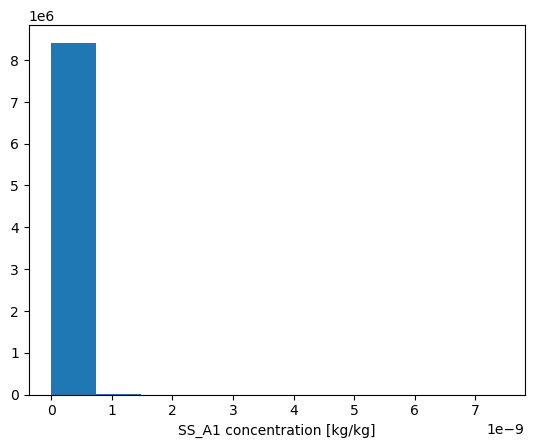

In [26]:
ds['SS_A1'].plot()

In [27]:
ds['SS_Model'] = 0
ds['SS_Model'] = ds['SS_Model'] + ds['SS_A1'] + ds['SS_A2'] + ds['SS_A3']
ds['SS_Model'].attrs['units'] ='kg/kg'

In [28]:
var = 'SS_Model'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'

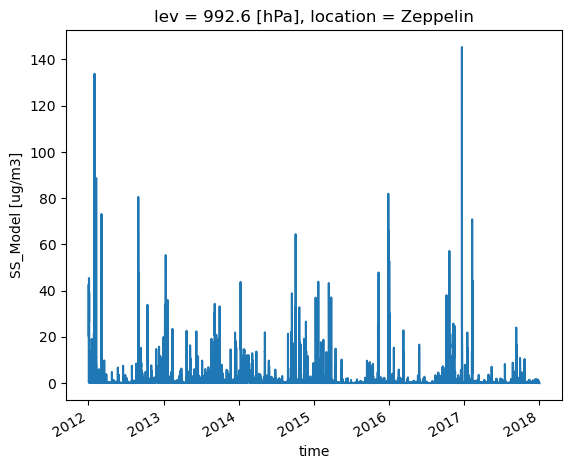

In [29]:
ds['SS_Model'].sel(location = 'Zeppelin').isel(lev = -1).plot()

In [30]:
ds_season = ds.groupby('time.season').mean()
ds_season['SO4_tot'].attrs['units'] = 'ug/m3'
ds_season['SO4_tot'].attrs['long_name'] = 'Total Sulphate Concentration'
ds_season['N100'].attrs['units'] = 'm$^-3$'
ds_season['N100'].attrs['long_name'] = 'N$_100$'
ds_season

<xarray.Dataset>
Dimensions:   (location: 5, season: 4, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables: (12/14)
    SO4_A1    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_A2    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_AC    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_NA    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_PR    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_tot   (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    ...        ...
    N200      (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N50       (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A1     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A2     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A3     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_Model  (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>

In [31]:
ds_season = ds_season.load()

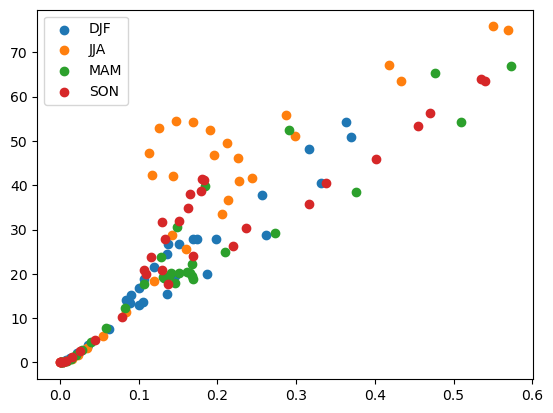

In [32]:
for seas in ds_season.season:
    plt.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['N100'].sel(season=seas,location = 'Zeppelin'),
                label=seas.values)
                
plt.legend()

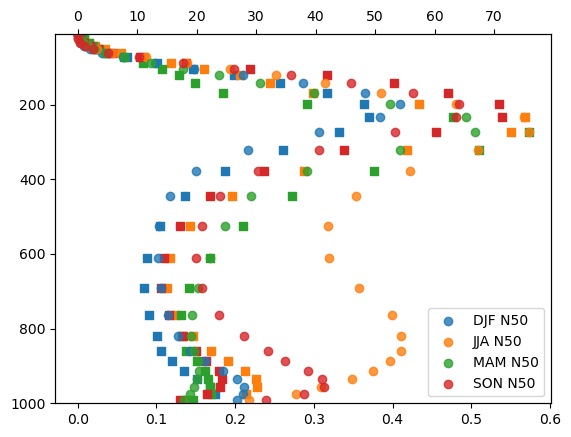

In [33]:
ig, ax1 = plt.subplots()

for seas in ds_season.season:
    ax1.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                marker = 's',
                label=f'{seas.values} SO4')
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = ax1.twiny() 
for seas in ds_season.season:
    ax2.scatter(x = ds_season['N100'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                label=f'{seas.values} N50', alpha = 0.8)

ax1.set_ylim([1000,10])
plt.legend()

In [34]:
percentage_SO4 = (ds_season['SO4_tot']/(ds_season['SO4_tot'].max()))
percentage_N100 = (ds_season['N100']/(ds_season['N100'].max()))
percentage_SO4 = percentage_SO4.load()
percentage_N100 = percentage_N100.load()

In [35]:
factor = percentage_SO4 / percentage_N100
N100_div_SO4 = percentage_N100/percentage_SO4

(1042.0017265947536, -45.80216577742249)

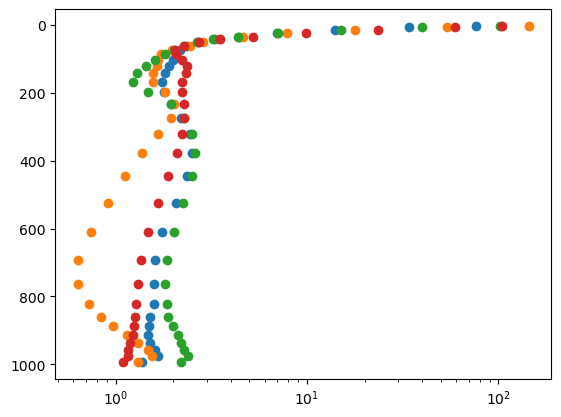

In [36]:
fig, ax = plt.subplots()
for seas in factor.season:
    ax.scatter(x= factor.sel(season=seas,location = 'Zeppelin'),
               y= factor['lev'],
              label=seas.values)
ax.set_xscale('log')
ax.set_ylim(ax.get_ylim()[::-1])

(1042.0017265947536, -45.80216577742249)

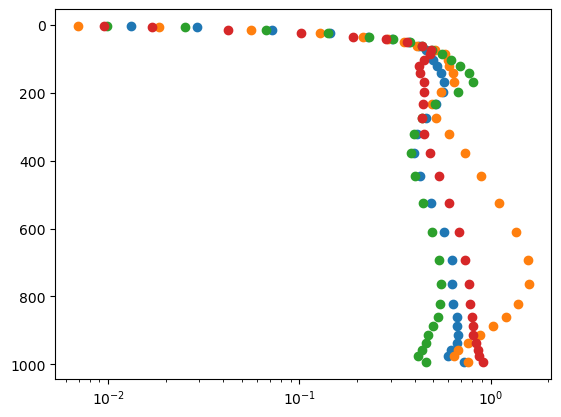

In [37]:
fig, ax = plt.subplots()
for seas in N100_div_SO4.season:
    ax.scatter(x= N100_div_SO4.sel(season=seas,location = 'Zeppelin'),
               y= N100_div_SO4['lev'],
              label=seas.values)
ax.set_xscale('log')
ax.set_ylim(ax.get_ylim()[::-1])

### BC vs N50 and N100

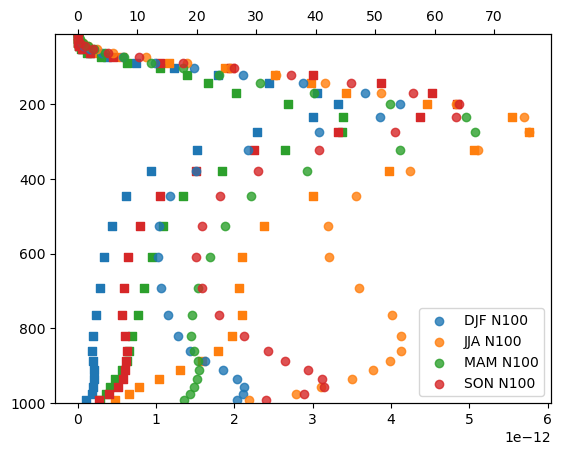

In [38]:
ig, ax1 = plt.subplots()

for seas in ds_season.season:
    ax1.scatter(x = ds_season['BC_AI'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                marker = 's',
                label=f'{seas.values} BC_AI')
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = ax1.twiny() 
for seas in ds_season.season:
    ax2.scatter(x = ds_season['N100'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                label=f'{seas.values} N100', alpha = 0.8)

ax1.set_ylim([1000,10])
plt.legend()

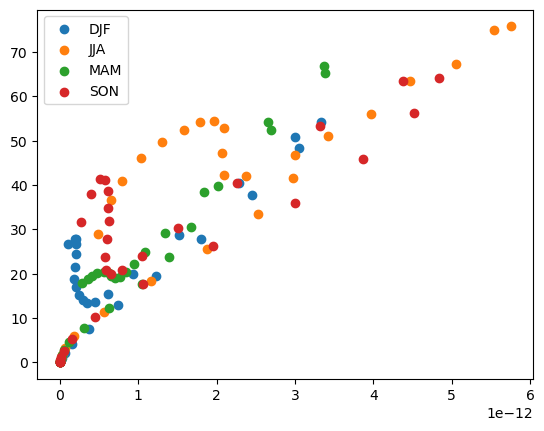

In [39]:
for seas in ds_season.season:
    plt.scatter(x = ds_season['BC_AI'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['N100'].sel(season=seas,location = 'Zeppelin'),
                label=seas.values)
                
plt.legend()

## Daily resample and the N50 and N100 ploted against SO4 total

In [40]:
ds_daily = ds.resample(time='d').mean('time')
ds_daily['season']= ds_daily['time.season']

ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/15)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_Model  (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

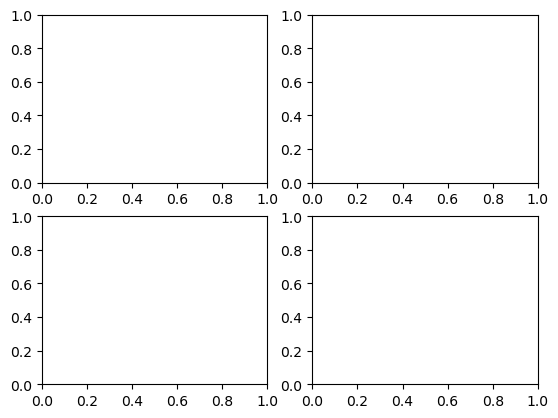

In [41]:
fig, axs = plt.subplots(2,2)



In [42]:
ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/15)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_Model  (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

In [43]:
_ds = ds_daily.sel(location='Zeppelin').isel(lev=-1)


_ds =_ds.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [44]:
_ds['season'] = _ds['time.season']

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression

DJF
 
170.1 x + 36.31
coefficient of determination: 0.14596577100628305
MAM
 
310.6 x + 23.64
coefficient of determination: 0.3677092142024211
JJA
 
350.9 x + 49.33
coefficient of determination: 0.3545305617608683
SON
 
357.1 x + 24.44
coefficient of determination: 0.4260601825722423


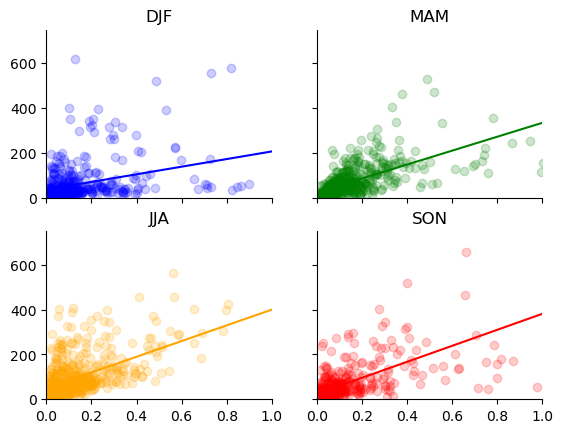

In [46]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['SO4_tot'].min(), _dss['SO4_tot'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_title (seas)
    ax.set_ylim ([0,750])
    ax.set_xlim ([0,1])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")
    
    sns.despine()

DJF
 
170.1 x + 36.31
coefficient of determination: 0.14596577100628305
MAM
 
310.6 x + 23.64
coefficient of determination: 0.3677092142024211
JJA
 
350.9 x + 49.33
coefficient of determination: 0.3545305617608683
SON
 
357.1 x + 24.44
coefficient of determination: 0.4260601825722423


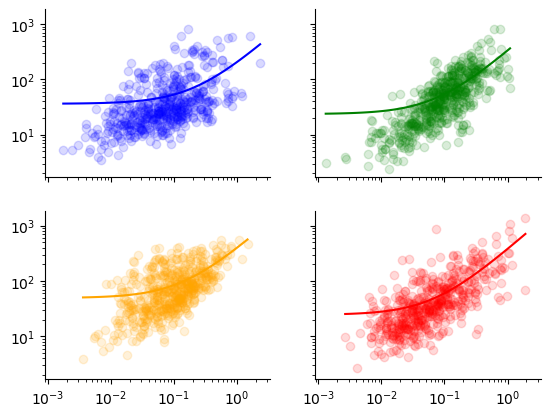

In [47]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c= col, alpha = 0.15)
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([0,750])
    #ax.set_xlim ([0,1.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")
    
    sns.despine()

DJF
MAM
JJA
SON


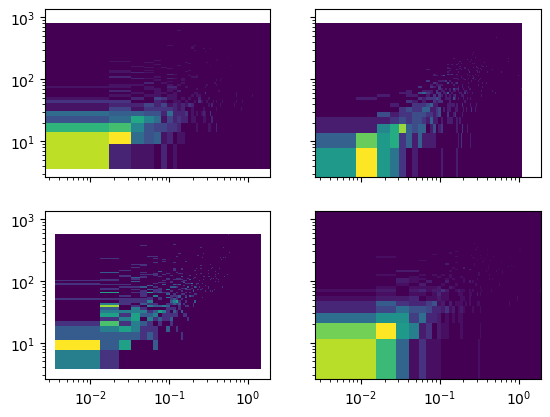

In [48]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.hist2d(x=_dss['SO4_tot'], y=_dss['N50'],bins = 150)
    #z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    #p = np.poly1d(z)
    #ax.plot( _dss['SO4_tot'], p( _dss['SO4_tot']), c = col, )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')

DJF
 
89.41 x + 14.9
coefficient of determination: 0.1524247792079021
MAM
 
77.79 x + 6.46
coefficient of determination: 0.39605535764995203
JJA
 
135.2 x + 9.687
coefficient of determination: 0.5153111406507862
SON
 
145.7 x + 11.75
coefficient of determination: 0.4272405732083431


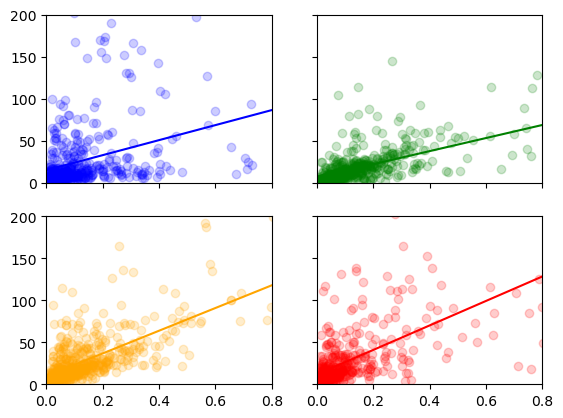

In [49]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['SO4_tot'].min(), _dss['SO4_tot'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,200])
    ax.set_xlim ([0,0.8])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
89.41 x + 14.9
coefficient of determination: 0.1524247792079021
MAM
 
77.79 x + 6.46
coefficient of determination: 0.39605535764995203
JJA
 
135.2 x + 9.687
coefficient of determination: 0.5153111406507862
SON
 
145.7 x + 11.75
coefficient of determination: 0.4272405732083431


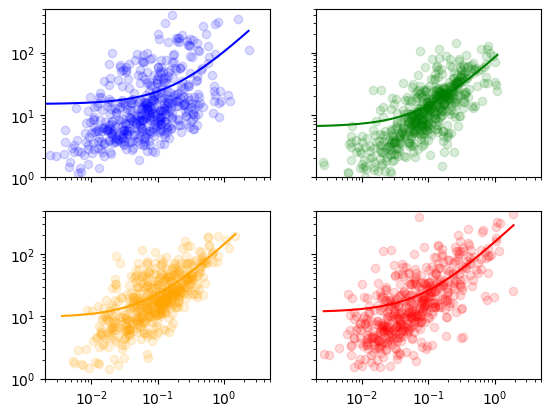

In [50]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'],c= col, alpha = 0.15)
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([1,500])
    ax.set_xlim ([0.002,5])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

DJF
MAM
JJA
SON


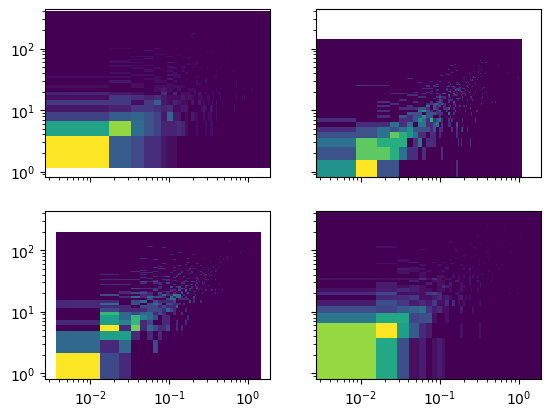

In [51]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.hist2d(x=_dss['SO4_tot'], y=_dss['N100'],bins = 150, )
    #z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    #p = np.poly1d(z)
    #ax.plot( _dss['SO4_tot'], p( _dss['SO4_tot']), c = col, )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')

DJF
 
8.342 x + 7.916
coefficient of determination: 0.8900160191727688
MAM
 
5.514 x + 13.51
coefficient of determination: 0.3998173965412727
JJA
 
6.603 x + 25.88
coefficient of determination: 0.13802666747527692
SON
 
9.965 x + 14.06
coefficient of determination: 0.45226763024721295


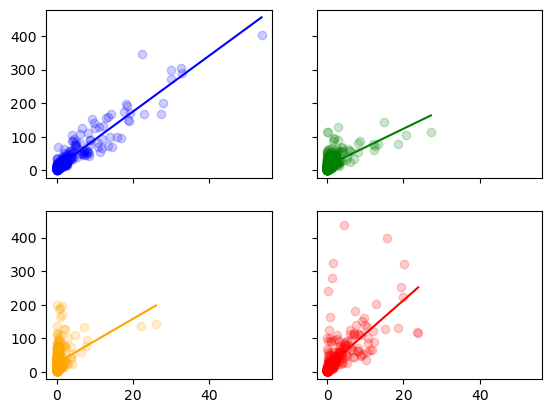

In [52]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SS_Model'], y=_dss['N100'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['SS_Model'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['SS_Model'].min(), _dss['SS_Model'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([0,200])
    #ax.set_xlim ([0,0.000000008])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SS_Model']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
8.342 x + 7.916
coefficient of determination: 0.890
MAM
 
5.514 x + 13.51
coefficient of determination: 0.400
JJA
 
6.603 x + 25.88
coefficient of determination: 0.138
SON
 
9.965 x + 14.06
coefficient of determination: 0.452


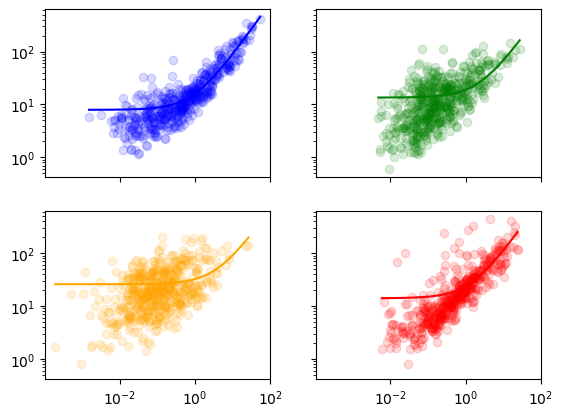

In [53]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SS_Model'], y=_dss['N100'],c= col, alpha = 0.15)
    z = np.polyfit(_dss['SS_Model'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SS_Model'].min()), np.log10(_dss['SS_Model'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([1,500])
    #ax.set_xlim ([0.002,5])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SS_Model']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq:0.3f}")

### BC against N50 and N100

DJF
 
2.8e+14 x + 31.14
coefficient of determination: 0.21496443230146645
MAM
 
1.735e+14 x + 19.71
coefficient of determination: 0.6197450192937048
JJA
 
4.774e+13 x + 76.2
coefficient of determination: 0.1896904955643106
SON
 
7.942e+13 x + 51.26
coefficient of determination: 0.5406030757713447


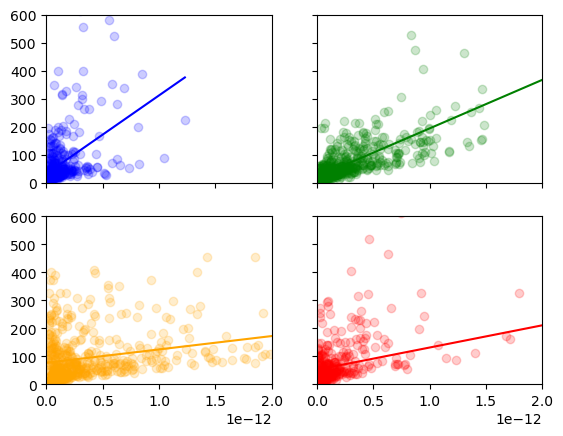

In [54]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['BC_AI'].min(), _dss['BC_AI'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,600])
    ax.set_xlim ([0,0.000000000002])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
2.8e+14 x + 31.14
coefficient of determination: 0.21496443230146645
MAM
 
1.735e+14 x + 19.71
coefficient of determination: 0.6197450192937048
JJA
 
4.774e+13 x + 76.2
coefficient of determination: 0.1896904955643106
SON
 
7.942e+13 x + 51.26
coefficient of determination: 0.5406030757713447


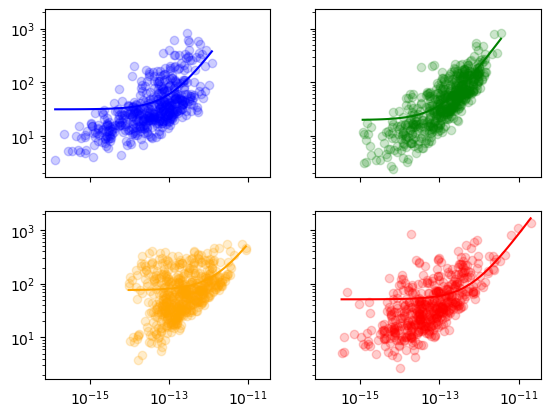

In [55]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['BC_AI'].min()), np.log10(_dss['BC_AI'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([0,600])
    #ax.set_xlim ([0,0.000000000002])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
1.346e+14 x + 13.45
coefficient of determination: 0.18764148871048425
MAM
 
3.669e+13 x + 7.406
coefficient of determination: 0.4755452376688263
JJA
 
2.205e+13 x + 18.29
coefficient of determination: 0.3962897674690533
SON
 
2.685e+13 x + 24.07
coefficient of determination: 0.3718630766508134


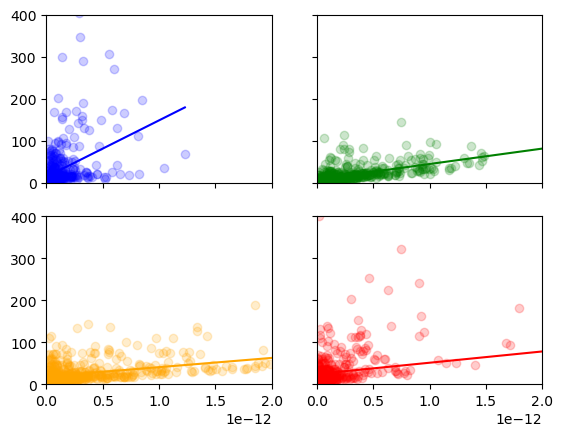

In [56]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N100'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['BC_AI'].min(), _dss['BC_AI'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,400])
    ax.set_xlim ([0,0.000000000002])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

## R-squared values for the sason and measurement level.

In [57]:
ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/15)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_Model  (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

In [58]:
Surface_daily = ds_daily.sel(location = 'Zeppelin').isel(lev=-1)
Surface_daily = Surface_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


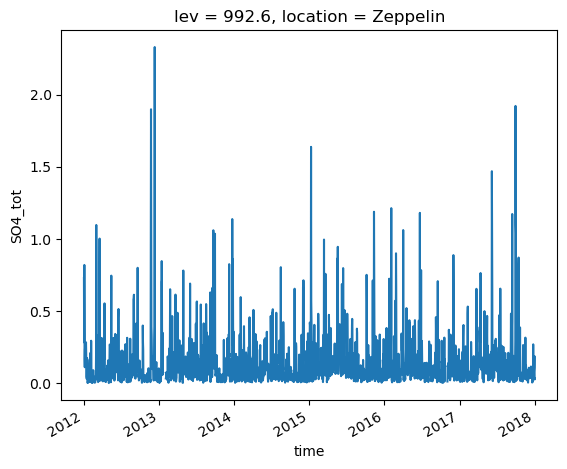

In [75]:
Surface_daily['SO4_tot'].plot()

In [1]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SO4_tot','N50']].dropna('time')
ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(0.14, 0.11, f'Linear regression : y = {p}' ,fontsize=8)
ax.set_ylim(0.1,10000)
ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SO4 ug/m$^3$')
plt.ylabel('N50')
ax.set_title(f'N50 vs SO4 (ug m-3)')
sns.despine()

#Calculating R-Squared
x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50'])
r_sq = model.score(x, _dss['N50'])
print(f"coefficient of determination: {r_sq}")
ax.text(1, 0.2, f'R$^2$ value : {r_sq:0.3f}' ,fontsize=8)

NameError: name 'plt' is not defined

 
113.4 x + 10.26
coefficient of determination: 0.3083837972706962


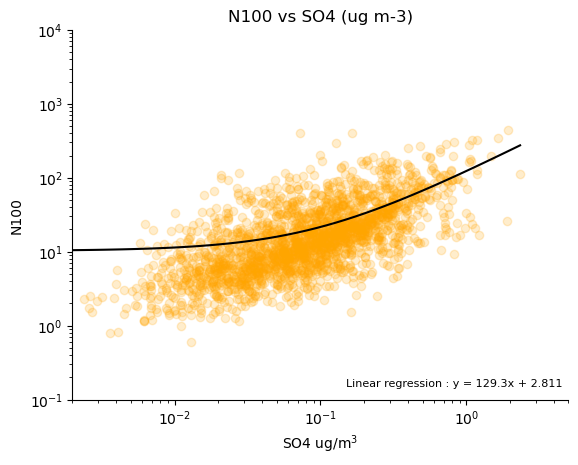

In [60]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SO4_tot','N100']].dropna('time')
ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'], c='orange', alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(0.15, 0.15, 'Linear regression : y = 129.3x + 2.811' ,fontsize=8)
ax.set_ylim(0.1,10000)
ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SO4 ug/m$^3$')
plt.ylabel('N100')
ax.set_title(f'N100 vs SO4 (ug m-3)')
sns.despine(f)

#Calculating R-Squared
x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
_y = np.array(_dss['N100'])
#_y.reshape((-1,1))
model = LinearRegression()
model.fit (x, _dss['N100'])
#model = LinearRegression().fit(_DSS, _y)
r_sq = model.score(x, _y)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.515


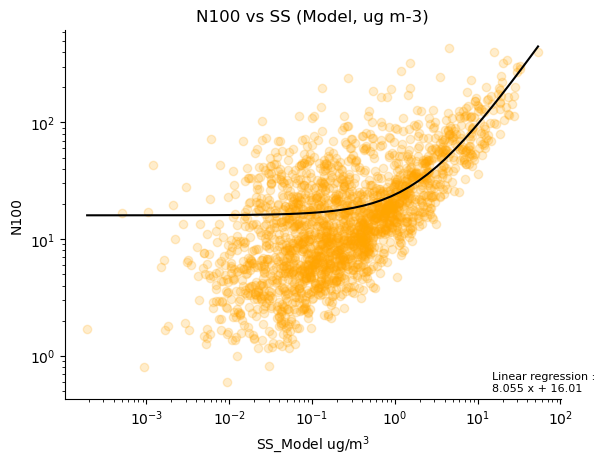

In [61]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SS_Model','N100']].dropna('time')
ax.scatter(x=_dss['SS_Model'], y=_dss['N100'], c='orange', alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SS_Model'], _dss['N100'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SS_Model'].min()), np.log10(_dss['SS_Model'].max()))
#print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(15, 0.5, f"Linear regression : {p}" ,fontsize=8)
#ax.set_ylim(0.1,10000)
#ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SS_Model ug/m$^3$')
plt.ylabel('N100')
ax.set_title(f'N100 vs SS (Model, ug m-3)')
sns.despine(f)

#Calculating R-Squared
x = np.array([_dss['SS_Model']]).reshape((-1, 1))
_y = np.array(_dss['N100'])
#_y.reshape((-1,1))
model = LinearRegression()
model.fit (x, _dss['N100'])
#model = LinearRegression().fit(_DSS, _y)
r_sq = model.score(x, _y)
print(f"coefficient of determination: {r_sq:0.3f}")

coefficient of determination: 0.249


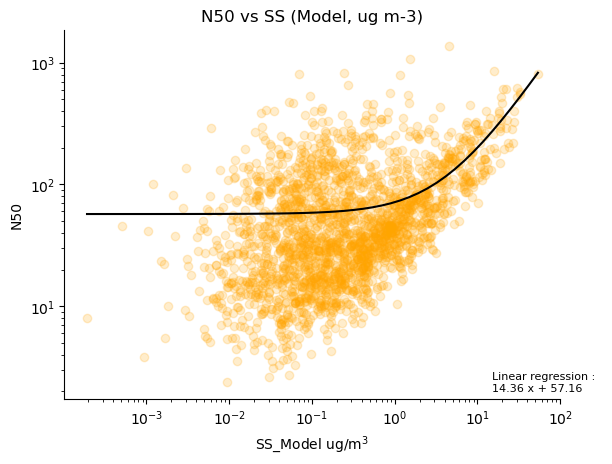

In [62]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SS_Model','N50']].dropna('time')
ax.scatter(x=_dss['SS_Model'], y=_dss['N50'], c='orange', alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SS_Model'], _dss['N50'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SS_Model'].min()), np.log10(_dss['SS_Model'].max()))
#print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(15, 2, f"Linear regression : {p}" ,fontsize=8)
#ax.set_ylim(0.1,10000)
#ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SS_Model ug/m$^3$')
plt.ylabel('N50')
ax.set_title(f'N50 vs SS (Model, ug m-3)')
sns.despine(f)

#Calculating R-Squared
x = np.array([_dss['SS_Model']]).reshape((-1, 1))
_y = np.array(_dss['N50'])
#_y.reshape((-1,1))
model = LinearRegression()
model.fit (x, _dss['N50'])
#model = LinearRegression().fit(_DSS, _y)
r_sq = model.score(x, _y)
print(f"coefficient of determination: {r_sq:0.3f}")

In [63]:
winter_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'DJF')
winter_daily = winter_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [64]:
spring_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'MAM')
spring_daily = spring_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [65]:
summer_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'JJA')
summer_daily = summer_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [66]:
fall_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'SON')
fall_daily = fall_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [67]:
import seaborn as sns

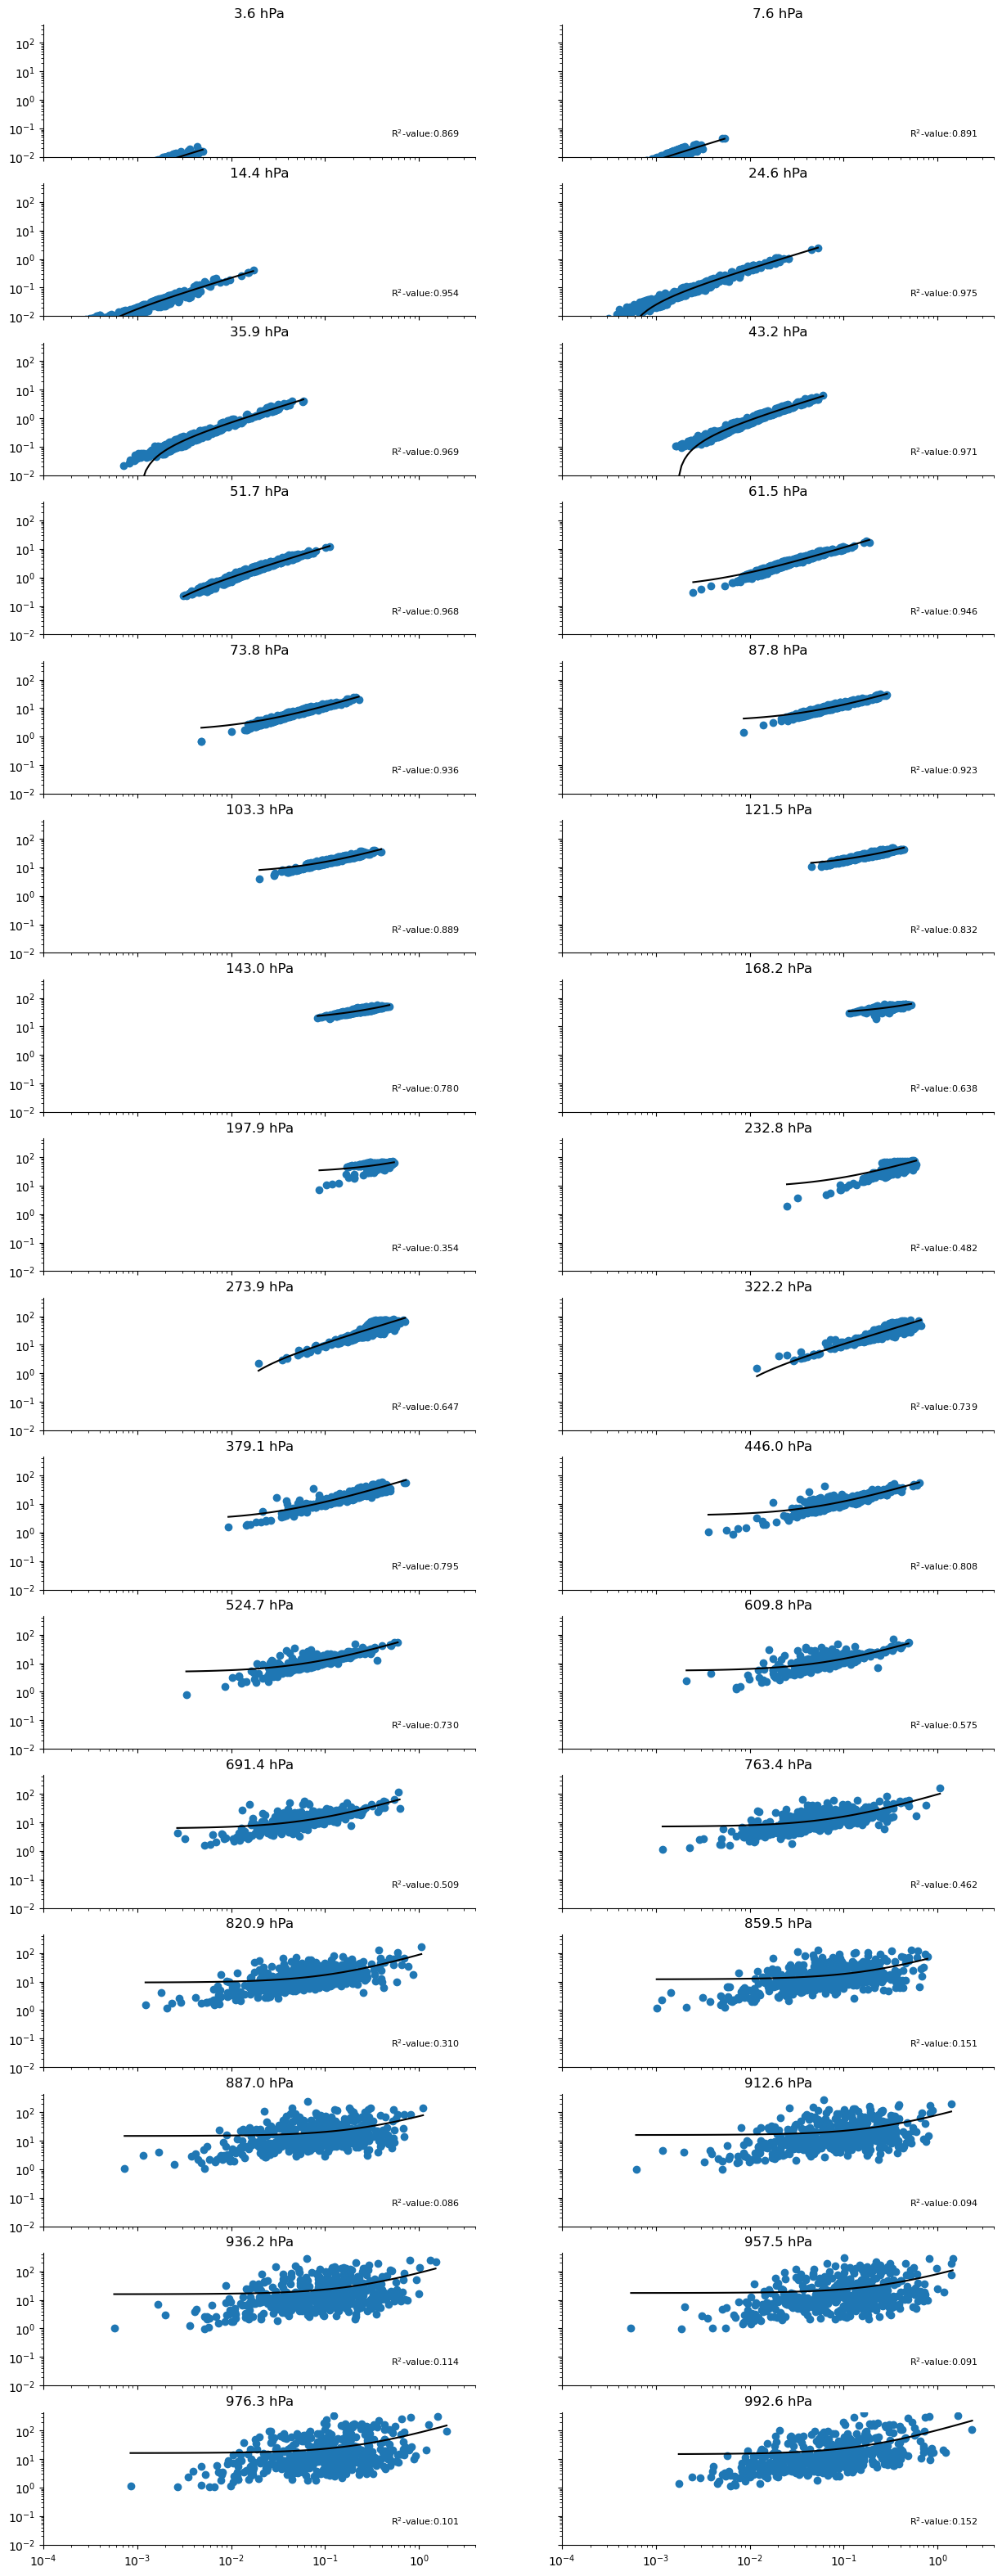

In [68]:
fig, axs = plt.subplots(16,2, sharex=True, sharey=True, figsize = [15,40])

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(winter_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = winter_daily.where(winter_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #dpi = 100
    #print(p)
    ax.set_ylim ([0.01,450])
    ax.set_xlim ([0.0001,4])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.5, 0.05, f"R$^2$-value:{r_sq:0.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

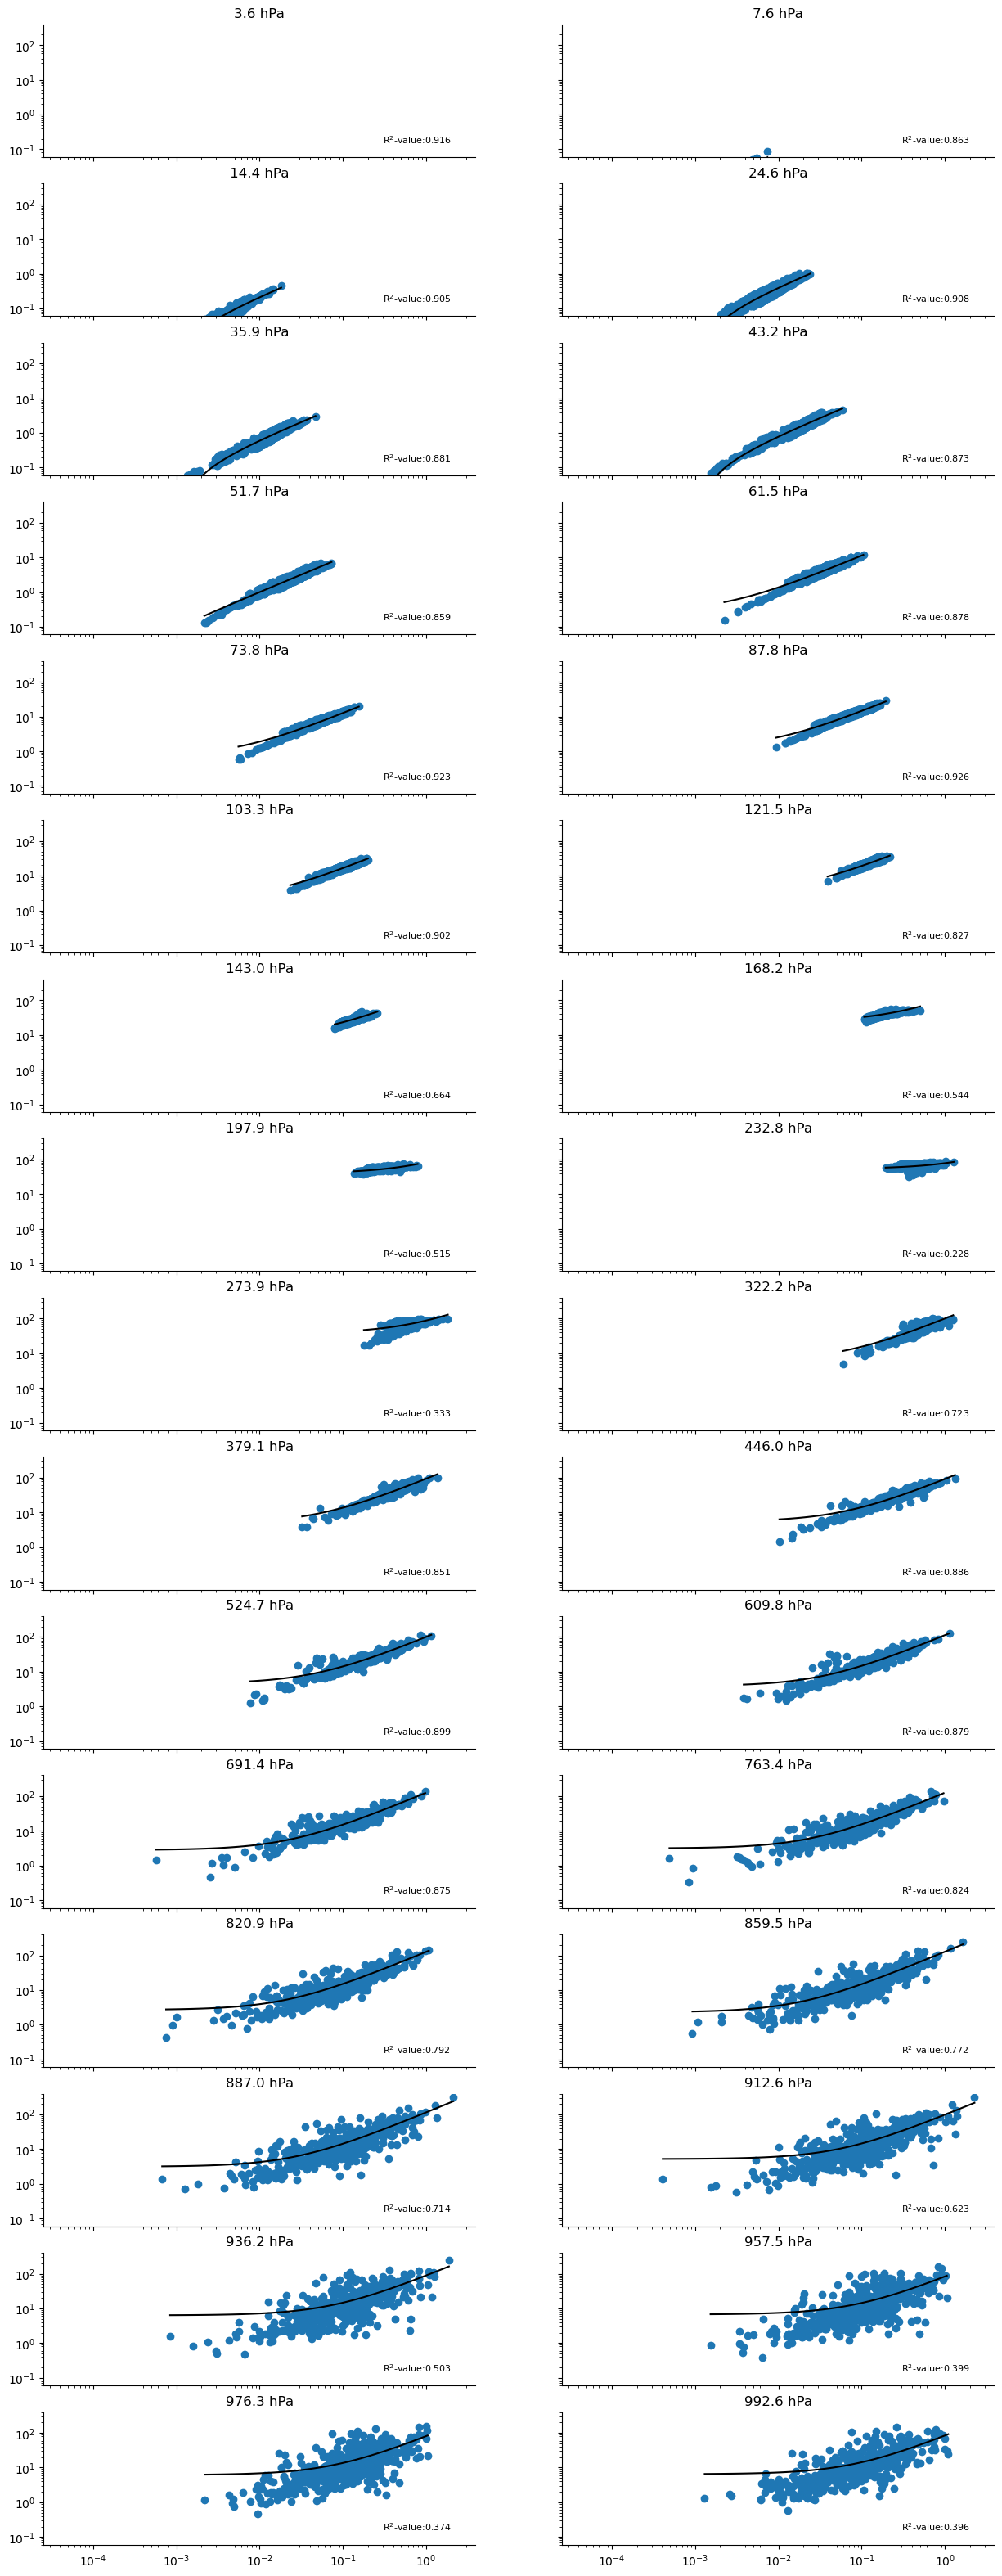

In [69]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(spring_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = spring_daily.where(spring_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    ax.set_ylim ([0.06,400])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.3, 0.15, f"R$^2$-value:{r_sq:0.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

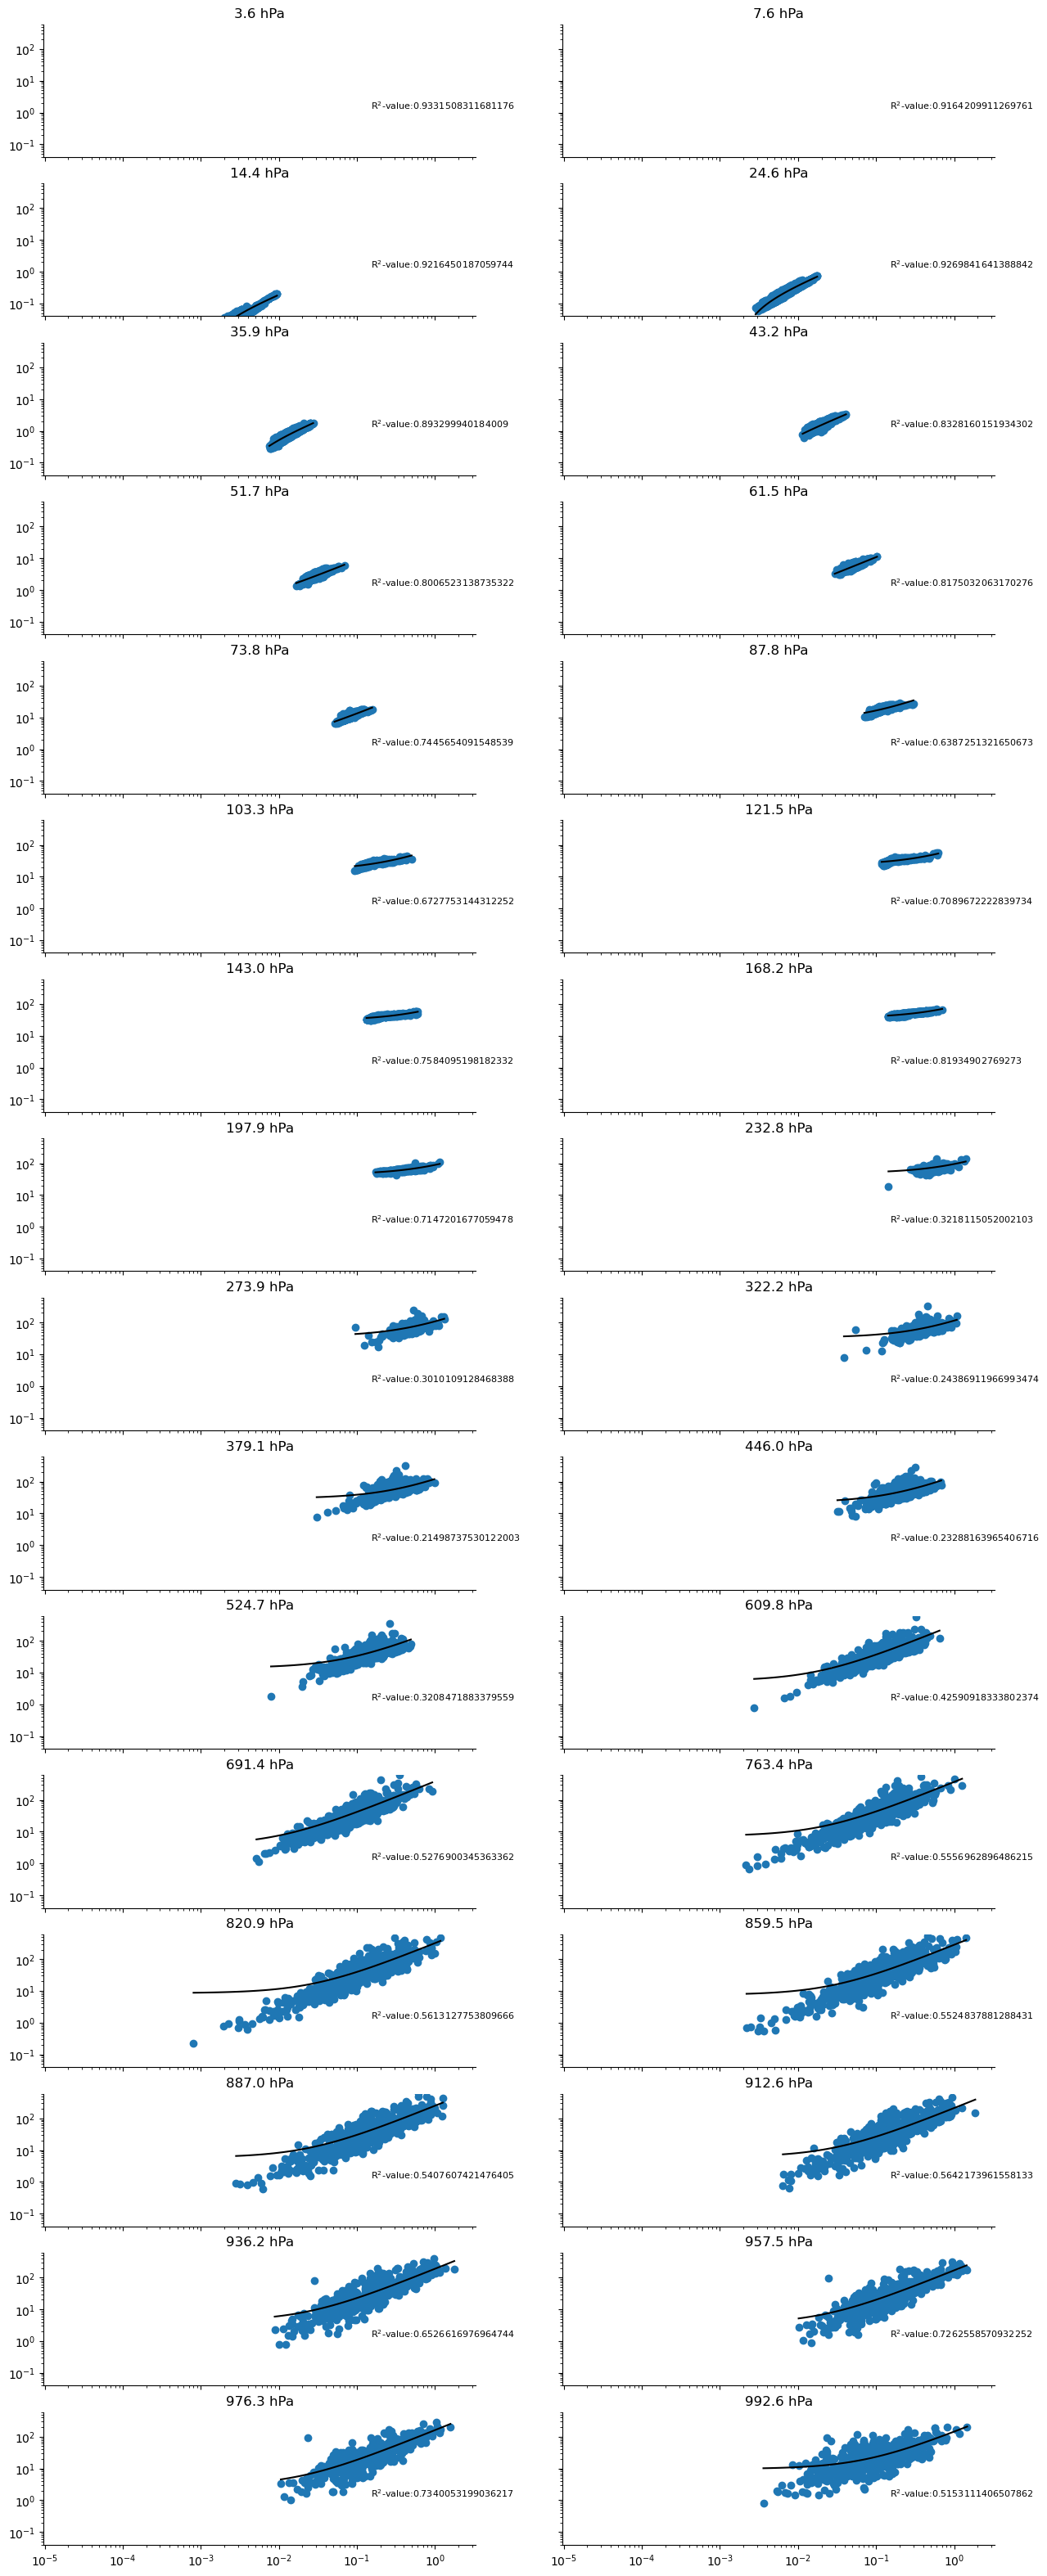

In [70]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(summer_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = summer_daily.where(summer_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    ax.set_ylim ([0.04,600])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.15, 1.3, f"R$^2$-value:{r_sq}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

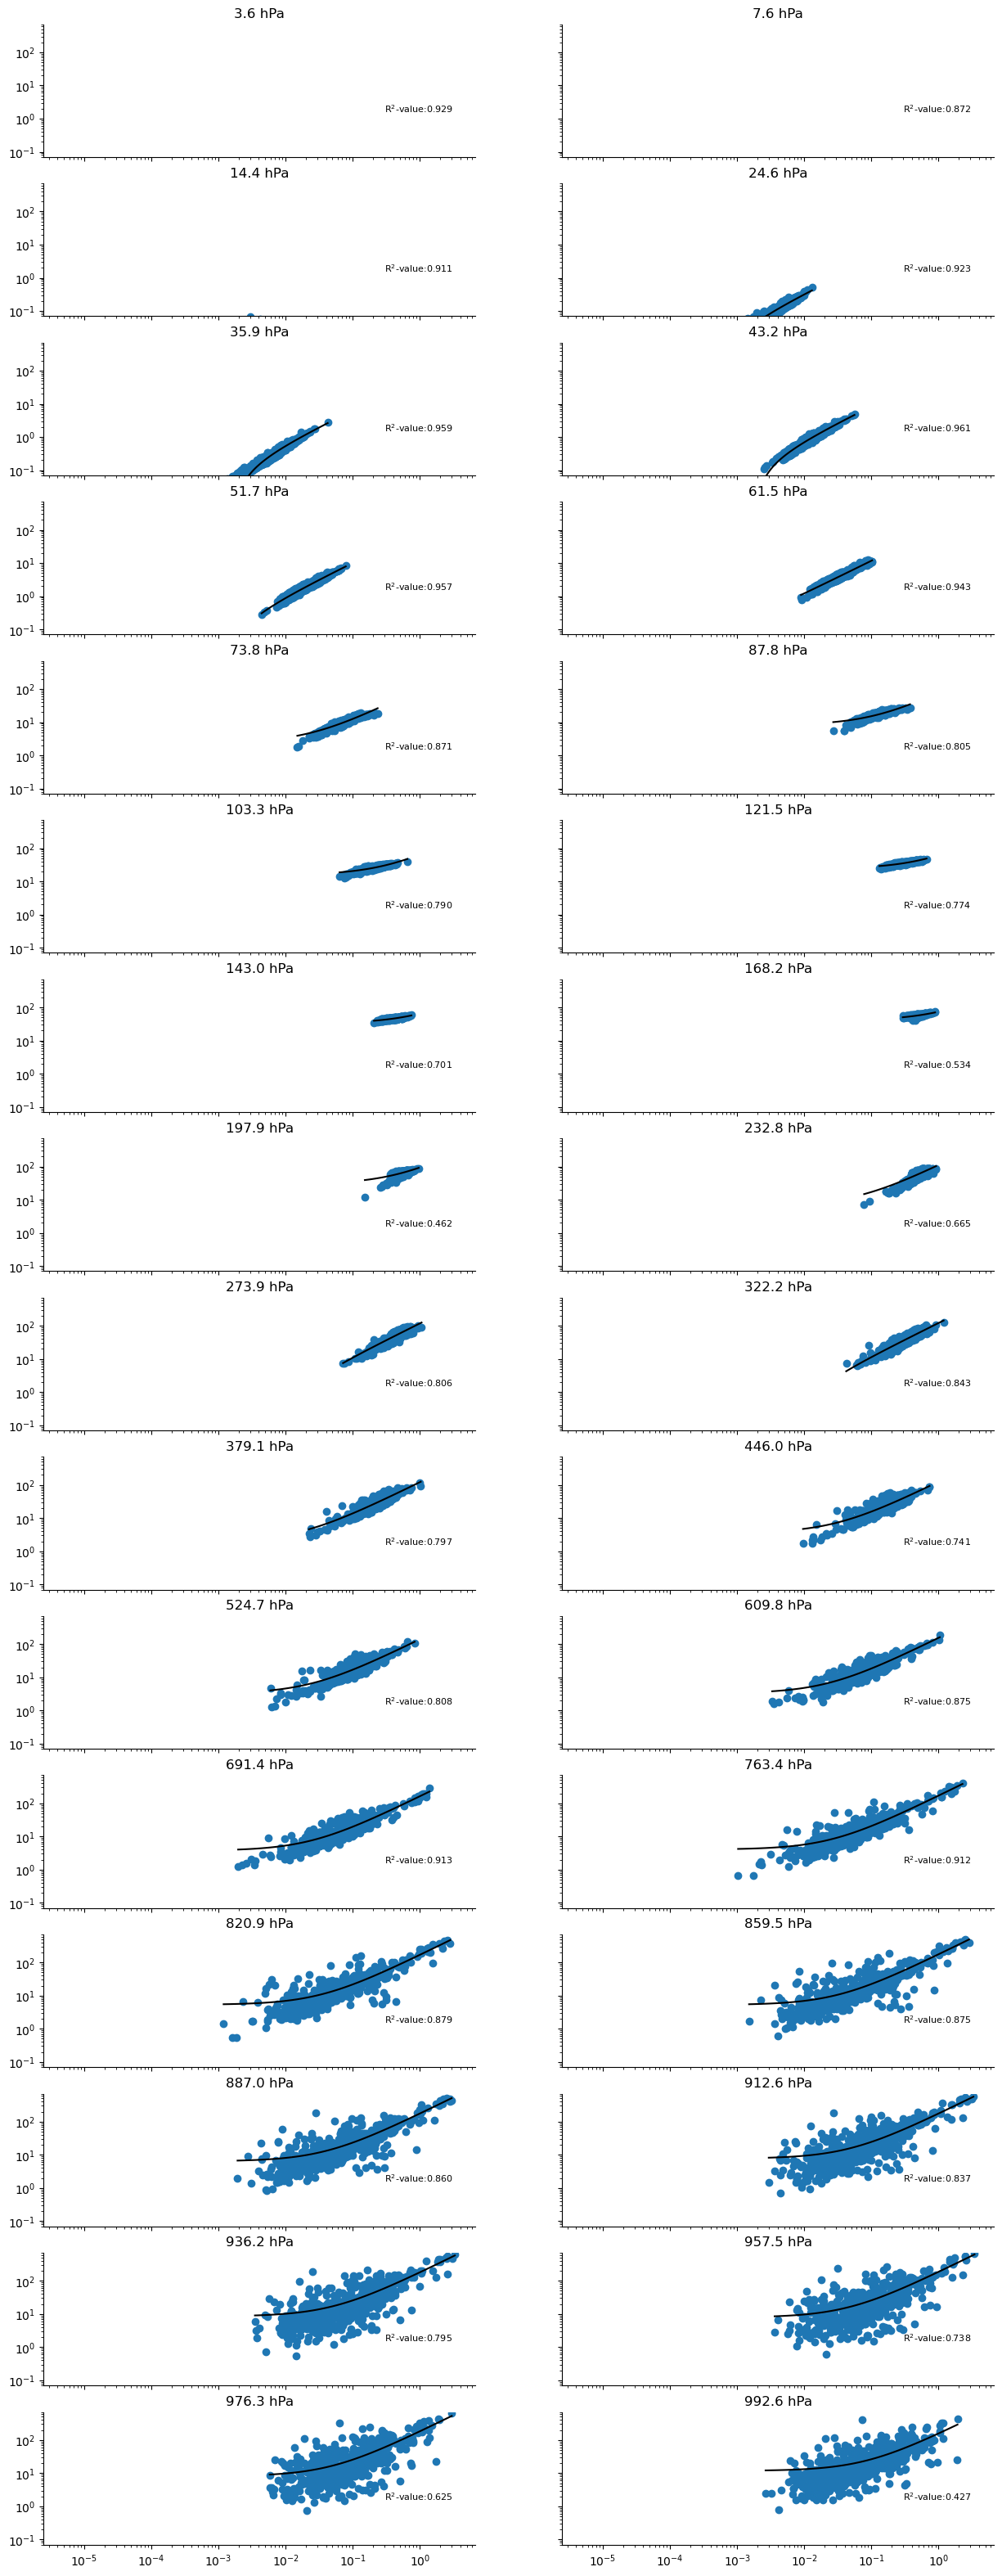

In [71]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(fall_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = fall_daily.where(fall_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    ax.set_ylim ([0.07,700])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.3, 1.5, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

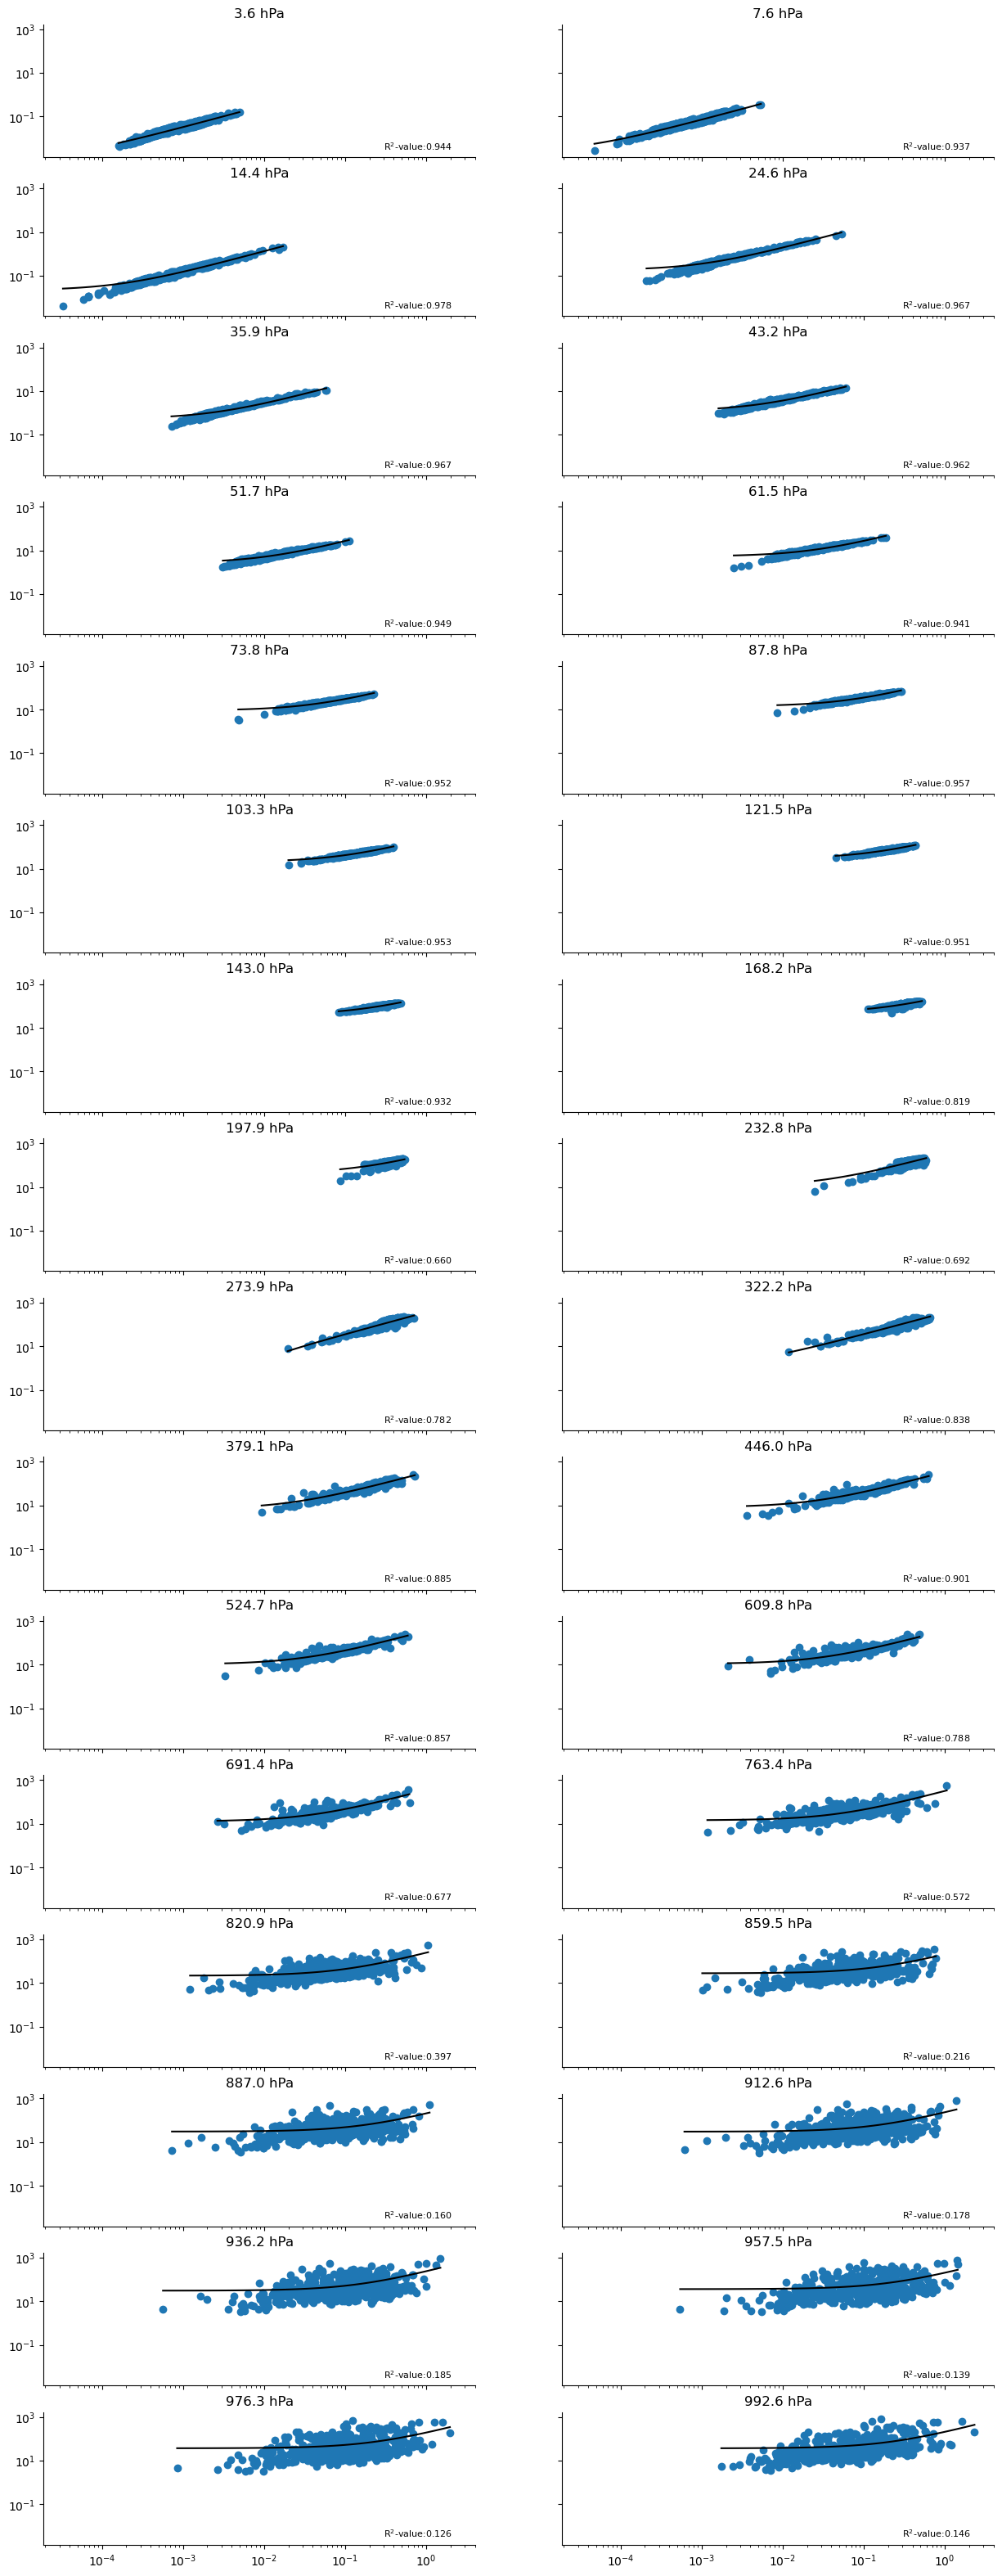

In [72]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(winter_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = winter_daily.where(winter_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    ax.text(0.3, 0.003, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

AttributeError: 'Figure' object has no attribute 'set_xlabel'

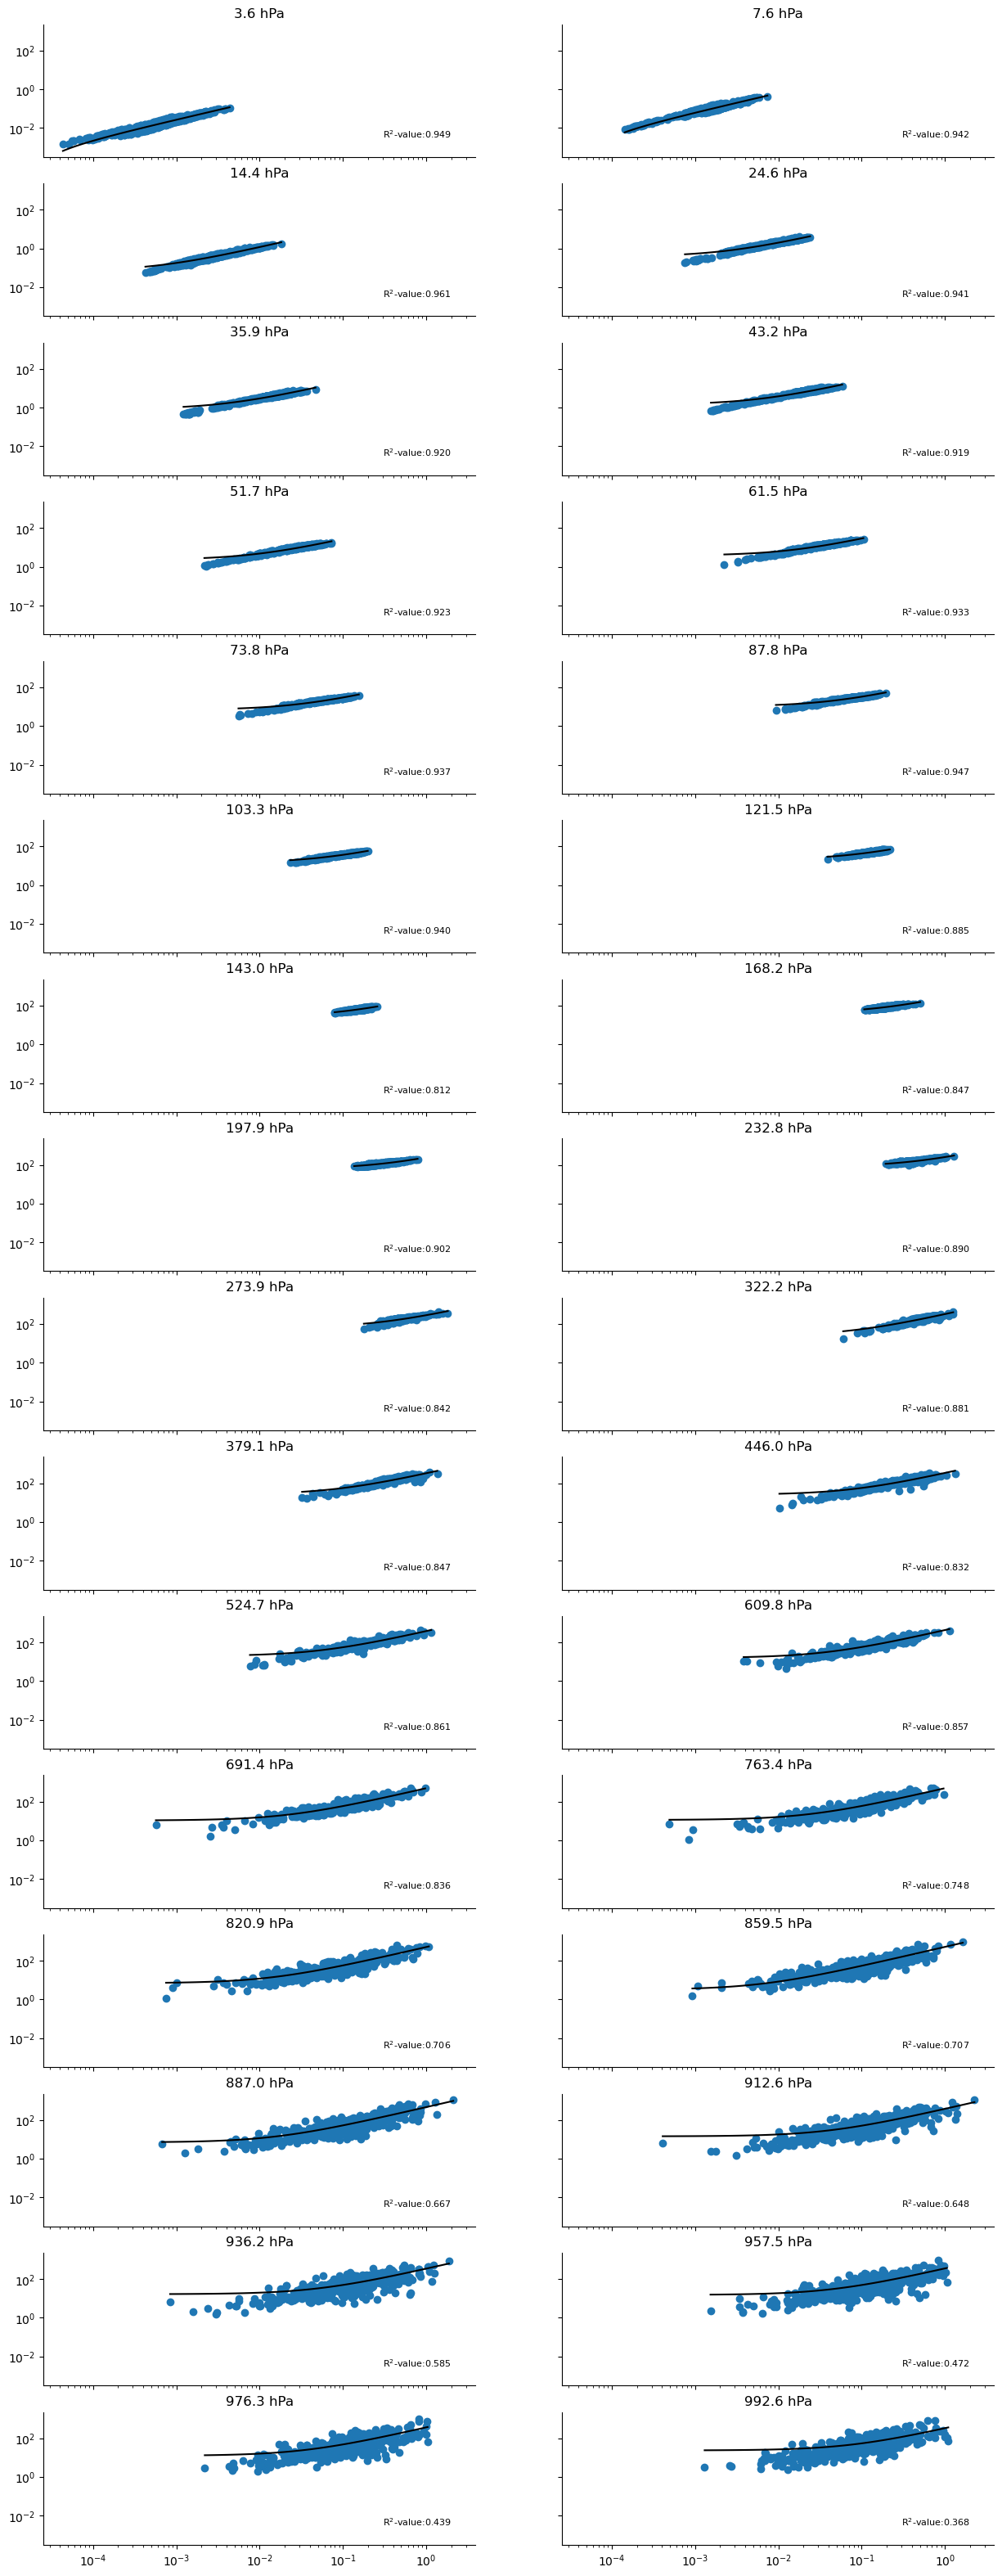

In [73]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(spring_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = spring_daily.where(spring_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    ax.text(0.3, 0.003, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)
fig.set_xlabel('SO4 ug/m$^3$')
fig.set_ylabel('N50 ug/m$^3$')

***

## Importing the observation data

In [ ]:
!pip install threddsclient
import threddsclient
import xarray as xr
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19930101070000.20210421112338.filter_3pack..aerosol.18y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [ ]:
dsmf_SUL = xr.open_dataset(opendap_urls)
dsmf_SUL

In [ ]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20110101070000.20210420142507.filter_3pack...1y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [ ]:
dsmf_S2011 = xr.open_dataset(opendap_urls)
dsmf_S2011

In [ ]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20120101070000.20210421112338.filter_3pack...6y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [ ]:
dsmf_S2012 = xr.open_dataset(opendap_urls)
dsmf_S2012

In [ ]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20180101070000.20220405123416.filter_3pack...4y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [ ]:
dsmf_S2018 = xr.open_dataset(opendap_urls)
dsmf_S2018

In [ ]:
dsmf_Sul = xr.Dataset()
dsmf_fixtime= xr.Dataset()
dsmf_fixtime_Salt = xr.Dataset()
dsmf_salt = xr.Dataset()

In [ ]:
dsmf_fixtime['SO4'] = xr.concat([dsmf_SUL['sulphate_total_ug_per_m3'],dsmf_S2011['sulphate_total_ug_per_m3'],dsmf_S2012['sulphate_total_ug_per_m3'],dsmf_S2018['sulphate_total_ug_per_m3']],dim = 'time')
dsmf_fixtime_Salt['SS'] = xr.concat([dsmf_SUL['sodium'],dsmf_S2011['sodium'],dsmf_S2012['sodium'],dsmf_S2018['sodium']],dim = 'time')

In [ ]:
dsmf_Sul = dsmf_fixtime.resample(time='d').mean('time')
dsmf_salt = dsmf_fixtime_Salt.resample(time='d').mean('time')

## Adding the N50/N100 data

In [ ]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

Steps:
- import
- daily
- calculate N50/N100
- concat
- merge

In [ ]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf08 = xr.open_mfdataset(opendap_urls[:1])

In [ ]:
daily2000 = dsmf00.resample(time='d').mean('time')
daily2006 = dsmf06.resample(time='d').mean('time')
daily2008 = dsmf08.resample(time='d').mean('time')

In [ ]:
from Sizedist_Util import compute_Nx_ebas_cleaned

ds_Nx_2000 =xr.Dataset()
ds_Nx_2000['N50'] = compute_Nx_ebas_cleaned(daily2000, x=50)
ds_Nx_2000['N100'] = compute_Nx_ebas_cleaned(daily2000, x=100)

ds_Nx_2006 =xr.Dataset()
ds_Nx_2006['N50'] = compute_Nx_ebas_cleaned(daily2006, x=50)
ds_Nx_2006['N100'] = compute_Nx_ebas_cleaned(daily2006, x=100)

ds_Nx_2008 =xr.Dataset()
ds_Nx_2008['N50'] = compute_Nx_ebas_cleaned(daily2008, x=50)
ds_Nx_2008['N100'] = compute_Nx_ebas_cleaned(daily2008, x=100)

In [ ]:
dsmf10_aero = xr.open_dataset('../../../Data/dNdlogD_data_dmps_cleaned_2010-2020.nc')
dsmf10_aero.compute()

In [ ]:
daily2010 = dsmf10_aero.resample(time='d').mean('time')

In [ ]:
ds_Nx_2010 =xr.Dataset()
ds_Nx_2010['N50'] = compute_Nx_ebas_cleaned(daily2010, x=50, var_diam = 'diameter', v_dNdlog10D='dNdlogD')
ds_Nx_2010['N100'] = compute_Nx_ebas_cleaned(daily2010, x=100, var_diam = 'diameter', v_dNdlog10D='dNdlogD')

In [ ]:
ds_Nx_2010
ds_Nx_2011 = ds_Nx_2010.sel(time=slice('2011-01','2020-12'))

In [ ]:
ds_Nx_all = xr.concat([ds_Nx_2000, ds_Nx_2006, ds_Nx_2008, ds_Nx_2011], dim = 'time',coords='minimal',compat='override')

In [ ]:
ds = xr.merge([dsmf_Sul.sel(time=slice('2000-03','2020-12')),ds_Nx_all,dsmf_salt.sel(time=slice('2000-03','2020-12'))])
ds

In [ ]:
ds['SO4'].attrs['Units'] = 'ug/m$^3$'
ds['N50'].attrs['Units'] = 'N50'
ds['N100'].attrs['Units'] = 'N100'
ds = ds.load()

In [ ]:
Model_ds = ds_daily.sel(location='Zeppelin').isel(lev = -1)
Model_ds = Model_ds.load()

In [ ]:
Model_ds['N50_Model'] = Model_ds['N50']
Model_ds['N100_Model'] = Model_ds['N100']
Model_ds

In [ ]:
Model_ds = Model_ds.drop_vars(['N50','N100'])
Model_ds

In [ ]:
ALLDATA = xr.merge([ds,Model_ds])
ALLDATA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ALLDATA.plot.scatter(x='SS_Model', y='SS',)


In [ ]:
ALLDATA['SS'].plot()

In [ ]:
ALLDATA['SO4'].attrs['Name'] = ['Observation Sulphate (ug/m$^3$)']
ALLDATA['SO4_tot'].attrs['Name'] = ['Model Sulphate (ug/m$^3$)']
ALLDATA['N50'].attrs['Name'] = ['Observation N50']
ALLDATA['N100'].attrs['Name'] = ['Observation N100']
ALLDATA['N50_Model'].attrs['Name'] = ['Model N50']
ALLDATA['N100_Model'].attrs['Name'] = ['Model N100']


## Surface level in model

In [ ]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_tot'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SO4'], _dss['SO4_tot'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))
ax.plot( x, p(x), c = 'black', )
print(p)



plt.xlabel('Observation SO4 ug/m$^3$')
plt.ylabel('Model SO4 ug/m$^3$')
ax.set_xlim ([-0.1,3])

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SO4_tot'])
r_sq = model.score(x, _dss['SO4_tot'])
ax.text(2.0, -0.05, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(f)

In [ ]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_tot'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
xscale ='log'
yscale = 'log'
z = np.polyfit(_dss['SO4'], _dss['SO4_tot'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))
ax.plot( x, x, c = 'black', )

plt.xlabel('Observation SO4 ug/m$^3$')
plt.ylabel('Model SO4 ug/m$^3$')
ax.set_yscale ('log')
ax.set_xscale ('log')
ax.set_xlim (0.05,3)

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))).reshape((-1,1))
_x = np.array([_dss['N50']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['SO4_tot'])
ax.text(1.0, 0.0023, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

In [ ]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N50'], y = ALLDATA['N50_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N50'], _dss['N50_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N50'].min()), np.log10(_dss['N50'].max()))
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N50')
plt.ylabel('Model N50')

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['N50'].min()), np.log10(_dss['N50'].max()))).reshape(-1,1)
_x = np.array([_dss['N50']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['N50_Model'])
ax.text(350, 2.2, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

In [ ]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N100'], y = ALLDATA['N100_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N100'], _dss['N100_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N100'].min()), np.log10(_dss['N100'].max()))
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N100')
plt.ylabel('Model N100')

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['N100'].min()), np.log10(_dss['N100'].max()))).reshape(-1,1)
_x = np.array([_dss['N100']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['N100_Model'])
ax.text(350, 1.1, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

Flat line means that the model is underestimating the amount of something, steeper means that it is overestimating the amount present.\
A slope of 1 would be that NorESM models the variable perfectly.

In [ ]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SS'], y = ALLDATA['SS_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SS'], _dss['SS_Model'], 1)
p = np.poly1d(z)
x= np.logspace(-2, np.log10(_dss['SS'].max()))
ax.plot( x, p(x), c = 'blue', )
ax.plot( x, x, c = 'black', )
#print(p)

ax.text(2.0, 0.00015, f"Linear Regression = {p}"  ,fontsize=8)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation SS')
plt.ylabel('Model SS')

#Calculating R-Squared
x = np.array([_dss['SS']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SS_Model'])
r_sq = model.score(x, _dss['SS_Model'])
ax.text(2.0, 0.0004, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

In [ ]:
ig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex=True)
ax = axs[0]
sns.histplot(y= ALLDATA['N100_Model'], 
                x= ALLDATA['N100'],
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                cbar=True, cbar_kws=dict(shrink=.75),
                edgecolors=None,
                data = _df
                )

lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)

ax1 = axs[1]
sns.histplot(y= ALLDATA['N50'], 
                x= ALLDATA['N50'],
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                cbar=True, cbar_kws=dict(shrink=.75),
                edgecolors=None,
                data = _df
                )

lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)

#fn = make_fn_eval('_'.join(models),'scatt')
sns.despine(fig)


In [ ]:
ig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex=True)
ax = axs[0]
_dss = ALLDATA.to_dataframe().where([ALLDATA["SO4_tot"]>0.2])
sns.histplot(y= _dss['SO4_tot'], 
                x= _dss['SO4'],
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                cbar=True, cbar_kws=dict(shrink=.75),
                edgecolors=None,
                data = _dss
                )

lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
#fn = make_fn_eval('_'.join(models),'scatt')
sns.despine(fig)

## Histogram comparisons between the two variables

In [ ]:
ALLDATA['SO4'].plot.hist(color ='blue', alpha = 0.6,bins = 85,
                         xscale = 'log',)
                         #bins=np.logspace(np.log10(ALLDATA['SO4'].min()),np.log10(ALLDATA['SO4'].min().max())))

In [ ]:
plt.hist(ALLDATA['SO4'], color ='blue', alpha = 0.6, bins = 85,)
plt.xlim (0,4)
#plt.set_xscale ='log'

In [ ]:
f, ax = plt.subplots()


ax.hist(ALLDATA['SO4_tot'], color = 'red',bins = 40)
ax2 = ax.twinx()
ax2.hist(ALLDATA['SO4'], color ='blue', alpha = 0.6, bins = 85)

ax.set_xlim ([0,3])
ax2.set_xlim ([0,3])

#plt.legend()
#plt.xlabel('SO4 ug/m$^3$')




In [ ]:
ALLDATA['SO4'].plot()

In [ ]:
ALLDATA['SO4'].sel(time=slice('2015-01','2017-12')).plot()

In [ ]:
f, ax = plt.subplots()


ax.hist(ALLDATA['SO4_tot'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 100)
ax2 = ax.twinx()
ax2.hist(ALLDATA['SO4'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 50)

ax.set_xlim ([0,2])
ax2.set_xlim ([0,2])
ax.set_xlabel('SO4 concentration (ug/m$^3$)')
ax.set_ylabel('Frequency in Model (Red)')
ax2.set_ylabel('Frequency in Measured (Blue)')


#plt.legend()
#plt.xlabel('SO4 ug/m$^3$')

In [ ]:
f, ax = plt.subplots()


ax.hist(ALLDATA['N50_Model'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 150)
ax2 = ax.twinx()
ax2.hist(ALLDATA['N50'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 100)

ax.set_xlabel('N50') 
ax.set_xlim ([0,450])
ax.set_ylabel('Frequency in Model(Red)')
ax2.set_xlim ([0,450])
ax2.set_ylabel('Frequency in Measured(Blue)')

#plt.legend()

In [ ]:
f, ax = plt.subplots()


ax.hist(ALLDATA['N100_Model'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 90)
#xscale = 'log'
ax2 = ax.twinx()
ax2.hist(ALLDATA['N100'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 120)

ax.set_xlabel('N100') 
ax.set_xlim ([1,250])
ax.set_ylabel('Frequency Model (Red)')
ax2.set_xlim ([1,250])
ax2.set_ylabel('Frequency Observations (Blue)')
#plt.xscale('log')
#xscale = 'log'
#plt.xlabel ('N50')
